In [1]:
from datetime import timedelta, datetime, date

from graphprocessing import *
from models.greed import Greed
#from models.hs import RSL, TRM_RSL, RSLL
from models.local_ratio import Local_Ratio
from models.trm import TRM
from models.uga import UGA_RSL, RSL1


class Testing:
    def test_(self, algorithms, data, interval, start_time_, epsilon, radius):
        print('started thread')
        start_time_dt = data[start_time_][np.random.choice(data.index)]
        td = timedelta(minutes=interval)
        graph = build_cwgraph(data, start_time_dt, start_time_dt + td, radius=radius, epsilon=epsilon)
        while len(graph.nodes) < 4:
            print('failed')
            start_time_dt = data[start_time_][np.random.choice(data.index)]
            graph = build_cwgraph(data, start_time_dt, start_time_dt + td, radius=radius, epsilon=epsilon)
        print('nodes:', len(graph.nodes))
        temp = []
        tempt = []
        for algo in algorithms:
            print(str(algo))
            start = datetime.now()
            score = algo.test(graph)[1]
            temp.append(score)
            tempt.append((datetime.now() - start).total_seconds())
            print(score)
        return (temp, tempt, len(list(graph.nodes)), start_time_dt, get_shortest_assignment(graph))

    def test(self, algorithms, data, interval, start_time_='started_at', epsilon=1.0, radius=500, trials=10):
        self.scores = []
        # epochs = int((max(data.starttime)-start_time).total_seconds()/(60*15))
        self.runtimes = []
        self.graphs = []
        self.times = []
        results = []
        for i in range(trials):
            results.append(self.test_(algorithms, data, interval, start_time_, epsilon, radius))
        scores = [results[i][0] for i in range(len(results))]
        runtimes = [results[i][1] for i in range(len(results))]
        graph_sizes = [results[i][2] for i in range(len(results))]
        times = [results[i][3] for i in range(len(results))]
        sdists = [results[i][4] for i in range(len(results))]
        return scores, runtimes, times, graph_sizes, sdists


def run_test(data, name='citi', interval=1):
    testing = Testing()
    scores, runtimes, times, graphs, sdists = testing.test([Greed(), UGA_RSL(), RSL1(), Local_Ratio(), TRM(), RSL(), TRM_RSL(), RSLL()],
                                                           data, interval=interval, epsilon=0.2, trials=5)

    cols = ['Greed', 'UGA_RSL', 'RSL1', 'Local_Ratio', 'TRM', 'RSL', 'TRM_RSL', 'RSLL']
    # cols=['Greed']
    scores_df = pd.DataFrame(np.abs(scores),
                             columns=cols)
    runtimes_df = pd.DataFrame(np.abs(runtimes),
                               columns=cols)
    scores_df.to_csv('outputs/scores_' + name + '.csv')
    runtimes_df.to_csv('outputs/runtimes_' + name + '.csv')
    times_df = pd.DataFrame(times)
    graphs_df = pd.DataFrame(graphs)
    times_df.to_csv('outputs/times_' + name + '.csv')
    graphs_df.to_csv('outputs/graphs_' + name + '.csv')
    sdists_df = pd.DataFrame(sdists)
    sdists_df.to_csv('outputs/sdists_'+name+'.csv')


def metrodate(s):
    date, time = s.split(' ')
    month, day, year = date.split('/')

    hour, minute = time.split(':')
    return {'month': int(month), 'day': int(day), 'year': int(year), 'hour': int(hour), 'minute': int(minute)}

metro = pd.read_csv('data/metro-trips-2021-q1.csv')
metro[start_time] = metro['start_time'].apply(lambda x: datetime(**metrodate(x)))
metro[end_time] = metro['end_time'].apply(lambda x: datetime(**metrodate(x)))
metro[start_station_name] = metro['start_station'].apply(str)
metro[end_station_name] = metro['end_station'].apply(str)
metro[start_lat] = metro['start_lat']
metro[start_lng] = metro['start_lon']
metro[end_lng] = metro['end_lon']
metro[end_lng] = metro['end_lon']

#run_test(metro, name='metro', interval=180)

# graph = build_station_graph(data,data.loc[0,start_time],data.loc[0,start_time]+timedelta(minutes=15))
# print(graph['E 6 St & Avenue D'])
# overflow = {node:{} for node in graph.nodes() if graph.nodes[node]['type']=='overflow'}
# underflow = {node:{} for node in graph.nodes() if graph.nodes[node]['type']=='underflow'}
# print('edgesss',graph.edges)
# print('vertixxx',graph.nodes)
#

# cgraph = cloned_station_vertices(graph)

data = pd.read_csv('data/202105-citibike-tripdata.csv')
data = data.loc[[type(i) == str for i in data[start_station_name]]]
data = data.loc[[type(i) == str for i in data[end_station_name]]]
# data = data.loc[data.index[:10000]]
data[start_time] = data[start_time].apply(lambda x: datetime.strptime(x, "%Y-%m-%d %H:%M:%S"))
data[end_time] = data[end_time].apply(lambda x: datetime.strptime(x, "%Y-%m-%d %H:%M:%S"))

capit = pd.read_csv('data/202105-capitalbikeshare-tripdata.csv')
capit = capit.loc[[type(i) == str for i in capit[start_station_name]]]
capit = capit.loc[[type(i) == str for i in capit[end_station_name]]]
# data = data.loc[data.index[:10000]]
capit[start_time] = capit[start_time].apply(lambda x: datetime.strptime(x, "%Y-%m-%d %H:%M:%S"))
capit[end_time] = capit[end_time].apply(lambda x: datetime.strptime(x, "%Y-%m-%d %H:%M:%S"))
#run_test(data, name='citi')

# ur = UGA_RSL()
# print(ur.find_optimal(cwgraph))
# u = UGA()
# print(u.find_optimal(cwgraph))


/Users/trentjohnson/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (5,7) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [2]:
data.shape,capit.shape

((2718594, 13), (219155, 13))

In [5]:
interval = 120
radius = 50
epsilon = 20
start_time_dt = data[start_time][np.random.choice(data.index)]
#start_time_dt = datetime(day=5,month=5,year=2021,hour=7:30)
td = timedelta(minutes=interval)
cwgraph = build_cwgraph(data, start_time_dt, start_time_dt + td, radius=radius, epsilon=epsilon)
overflow = [node for node in cwgraph.nodes() if cwgraph.nodes[node]['type'] == 'overflow']
underflow = [node for node in cwgraph.nodes() if cwgraph.nodes[node]['type'] == 'underflow']
worker = [node for node in cwgraph.nodes() if cwgraph.nodes[node]['type'] == 'worker']

adding vertex data


KeyboardInterrupt: 

In [ ]:
from aabbtree import AABB
from aabbtree import AABBTree

In [ ]:
wexy = [(cwgraph.nodes[node]['xs'],cwgraph.nodes[node]['ys']) for node in worker] 
wsxy = [(cwgraph.nodes[node]['xe'],cwgraph.nodes[node]['ye']) for node in worker] 
oxy = [(cwgraph.nodes[node]['x'],cwgraph.nodes[node]['y']) for node in overflow] 
uxy = [(cwgraph.nodes[node]['x'],cwgraph.nodes[node]['y']) for node in underflow] 





In [ ]:
from sklearn.cluster import SpectralClustering,DBSCAN
from sklearn.mixture import GaussianMixture
clustering = DBSCAN().fit_predict(oxy)

print(clustering)

In [ ]:
plt.figure(figsize=(18, 16))
n_clusts = int(len(graph.nodes)/5)
print(n_clusts)
oclustering = GaussianMixture(n_components=n_clusts).fit_predict(oxy)
uclustering = GaussianMixture(n_components=n_clusts).fit_predict(uxy)
clusters = pd.Series(oclustering+uclustering).unique()
print(colors)
colors=['#'+hex(np.random.randint(17,256))[2:]+hex(np.random.randint(17,256))[2:]+hex(np.random.randint(17,256))[2:] for i in range(max([len(clusters)]+clusters))]
i=0
for i in pd.Series(oclustering+uclustering).unique():
    #print(i)
    #print(colors[i])
    plt.scatter([cwgraph.nodes[node]['x'] for c,node in zip(oclustering,overflow) if c==i],[cwgraph.nodes[node]['y']for  c,node in zip(oclustering,overflow) if c==i],color=colors[i],marker='+',label=i)
    plt.scatter([cwgraph.nodes[node]['x'] for c,node in zip(uclustering,underflow) if c==i],[cwgraph.nodes[node]['y']for c,node in zip(uclustering,underflow) if c==i],color=colors[i],marker='o',label=i)
for node in worker:
    plt.plot([cwgraph.nodes[node]['xs'],cwgraph.nodes[node]['xe'] ],[cwgraph.nodes[node]['ys'],cwgraph.nodes[node]['ye']],label='start')
#plt.scatter([cwgraph.nodes[node]['xe'] for node in worker],[cwgraph.nodes[node]['ye'] for node in worker],label='end')


#plt.legend()


plt.show()

In [ ]:
len(worker),len(overflow)

In [ ]:
from models.hs import HS
from models.trm import TRM
graph,score = TRM().test(cwgraph)

In [ ]:
scores = []
from tqdm import tqdm
for i in tqdm(np.arange(0,10,1)**4):
    scores.append(HS().search(graph,cwgraph,threshold=i))
plt.plot(scores)
plt.show()

In [ ]:
score,rlsscore

In [ ]:
from models.hs import TRM_RLS
TRM_RLS().test(cwgraph)

In [ ]:
#greedy_density
def get_density(node,type1,type2,cwgraph,):
    density = 0
    for node_ in cwgraph:    
        if cwgraph.nodes[node_]['type'] != 'worker':
            dis = euc_dis(cwgraph.nodes[node]['x'],cwgraph.nodes[node]['y'],cwgraph.nodes[node_]['x'],cwgraph.nodes[node_]['y'])
            if cwgraph.nodes[node_]['type'] == type1 and dis !=0:
                density += 1/dis 
            if cwgraph.nodes[node_]['type'] == type2 and dis!=0:
                density -= 1/dis
    return density
under_densities = {node:get_density(node,'overflow','underflow',cwgraph) for node in underflow}
over_densities = {node:get_density(node,'underflow','overflow',cwgraph) for node in overflow}


In [ ]:
undersorted = sorted(under_densities.keys(),key=lambda a:under_densities[a])
oversorted = sorted(over_densities.keys(),key=lambda a:over_densities[a])
available_workers = [node for node in worker]
worker_dict = {w:[None,None] for w in worker}
to_trim = max([len(over_densities)-max([len(overflow),len(underflow)]),0])



oversorted

In [ ]:

for s in oversorted[to_trim:]:
    best_worker = available_workers.pop(np.argmin([euc_dis(cwgraph.nodes[s]['x'],cwgraph.nodes[s]['y'],
                            cwgraph.nodes[w]['xs'],cwgraph.nodes[w]['ys']) for w in available_workers]))
    
    worker_dict[best_worker][0] = s
    
available_workers = [node for node in worker]


for s in undersorted[to_trim:]:
    best_worker = available_workers.pop(np.argmin([euc_dis(cwgraph.nodes[s]['x'],cwgraph.nodes[s]['y'],
                            cwgraph.nodes[w]['xe'],cwgraph.nodes[w]['ye'])for w in available_workers]))
    
    worker_dict[best_worker][1] = s
worker_dict

In [ ]:
sum([euc_dis(cwgraph.nodes[w]['xs'],cwgraph.nodes[w]['xs'],cwgraph.nodes[o]['x'],cwgraph.nodes[o]['y']) + \
     euc_dis(cwgraph.nodes[w]['xe'],cwgraph.nodes[w]['xe'],cwgraph.nodes[u]['x'],cwgraph.nodes[u]['y']) +\
     euc_dis(cwgraph.nodes[o]['x'],cwgraph.nodes[o]['x'],cwgraph.nodes[u]['x'],cwgraph.nodes[u]['y']) for w,(o,u) in zip(worker_dict.keys(),worker_dict.values()) if not( u is None or o is None)])

In [ ]:
hours = [[] for i in range(24)]
print(hours)
start_time_dt = min(metro[start_time])
m = max(metro[start_time])

from tqdm import tqdm

for j in tqdm(range(90)):
    for i in range(24):
        oldh = hours[i]
        hours[i].append(sum((metro[start_time] >= start_time_dt) & (metro[start_time] <= (start_time_dt+timedelta(hours=1)))))
        start_time_dt=start_time_dt+timedelta(hours=1)
        if hours[i] == oldh:
            print(j)
sum_hours = np.array([sum(hours[i]) for i in range(24)])
sum(sum_hours)/24

In [ ]:
plt.plot(sum_hours)
plt.show()
for i in range(24):
    plt.hist(hours[i])
    plt.show()

In [ ]:
min(metro[start_time]),max(metro[start_time]),metro.shape

In [ ]:
print(metro['start_time'])

In [57]:
interval = 120
radius = 50
epsilon = 20
start_time_m = datetime(day=5,month=5,year=2021,hour=7,minute=30)
td = timedelta(minutes=interval)
mdata = capit.loc[(capit[start_time]>start_time_m)&(capit[start_time]<td+start_time_m),].dropna()
mstations = {station:{'change':0,'x':0,'y':0} for station in list(set(mdata[start_station_name].unique()).union(mdata[end_station_name].unique()))}

In [65]:
for i in mdata.index:
    start_station = mdata.loc[i,start_station_name]
    mstations[start_station]['change'] -=1 
    x,y,_,_ = utm.from_latlon(mdata.loc[i,'start_lat'],mdata.loc[i,'start_lng'])
    mstations[start_station]['x'] = x
    mstations[start_station]['y'] = y
    mstations[start_station]['lat'] = mdata.loc[i,'start_lat']
    mstations[start_station]['lon'] = mdata.loc[i,'start_lng']
    
    end_station = mdata.loc[i,end_station_name]
    mstations[end_station]['change'] +=1 
    x,y,_,_ = utm.from_latlon(mdata.loc[i,'end_lat'],mdata.loc[i,'end_lng'])
    mstations[end_station]['x'] = x
    mstations[end_station]['y'] = y
    mstations[end_station]['lat'] = mdata.loc[i,'end_lat']
    mstations[end_station]['lon'] = mdata.loc[i,'end_lng']
    



In [66]:
import os
os.listdir()

['citi_dots.png',
 '.DS_Store',
 'papers',
 'images',
 'paper stuff',
 'testing.ipynb',
 'models',
 '__pycache__',
 'data visuals.ipynb',
 '.gitignore',
 'outputs_old',
 'figures',
 'Data Vis 2.ipynb',
 'WAPTesting.ipynb',
 '.ipynb_checkpoints',
 'graphprocessing.py',
 'venv',
 '.git',
 '.vscode',
 'data',
 'officialtesting.py',
 'outputs',
 '.idea']

106
38.900283 -77.029822
38.90042673988099 -76.98825001716614


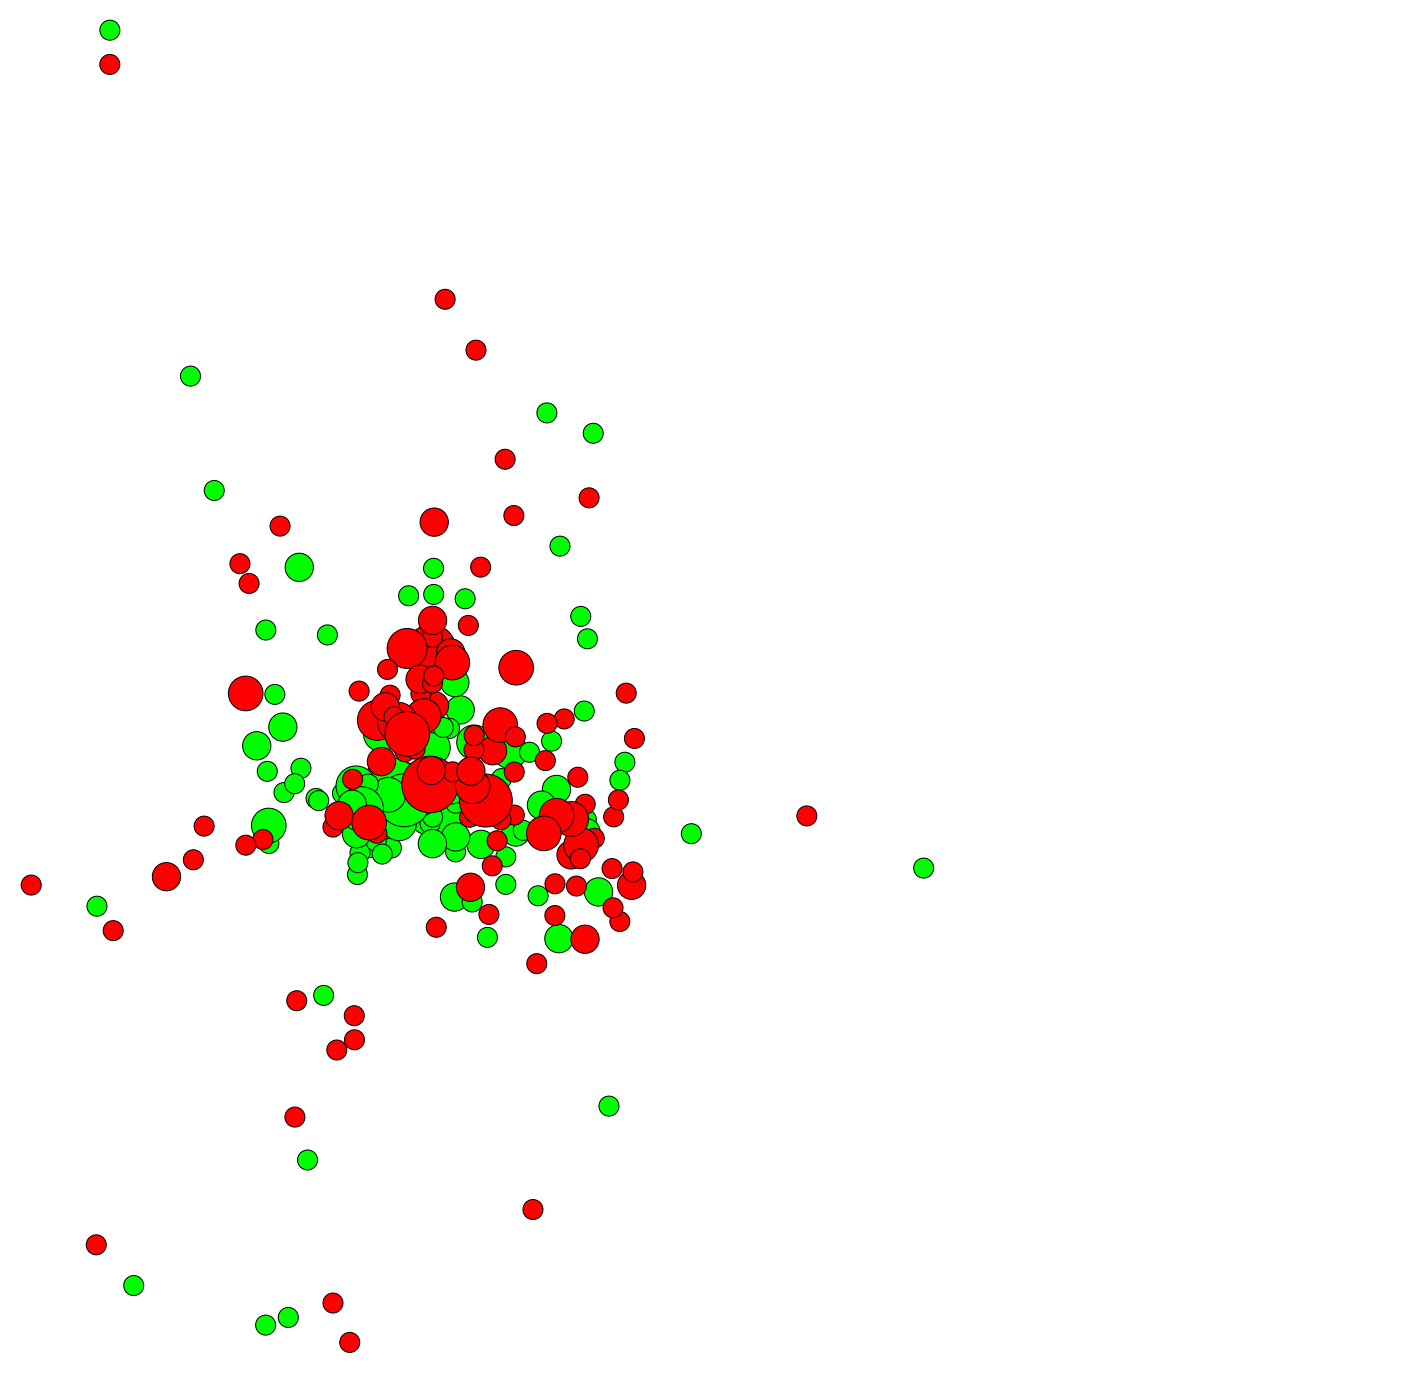

In [77]:
x=[mstations[i]['x'] for i in mstations.keys()]
y=[mstations[i]['y'] for i in mstations.keys()]
change=[mstations[i]['change'] for i in mstations.keys()]
delta = max([max(x)-min(x),max(y)-min(y)])+500
plt.figure(figsize=(25, 25))
plt.xlim(min(x)-500,min(x)+delta)
plt.ylim(min(y)-500,min(y)+delta)
xo = [x[i] for i in range(len(x)) if change[i] >0]
yo = [y[i] for i in range(len(y)) if change[i] >0]
changeo = [change[i] for i in range(len(x)) if change[i] >0]

yu = [y[i] for i in range(len(y)) if change[i] <0]
xu = [x[i] for i in range(len(x)) if change[i] <0]
changeu = [change[i] for i in range(len(y)) if change[i] <0]
print(len(changeu))

key1 = list(mstations.keys())[0]
key2 = list(mstations.keys())[1]
plt.scatter(xo,yo,s=200*np.array(changeo),color='#00ff00',edgecolors='#000000')
plt.scatter(xu,yu,s=200*np.abs(changeu),color='#ff0000',edgecolors='#000000')
#plt.scatter([mstations[key1]['x']],[mstations[key1]['y']],s=200*np.abs([changeu[0]]),color='#ffff00',edgecolors='#000000')
#plt.scatter([mstations[key2]['x']],[mstations[key2]['y']],s=200*np.abs([changeu[0]]),color='#ffff00',edgecolors='#000000')
print(mstations[key1]['lat'] ,mstations[key1]['lon'] )
print(mstations[key2]['lat'] ,mstations[key2]['lon'] )


plt.axis('off')
plt.savefig('figures/captial_dots.png',transparent=True,format='png')
plt.show()



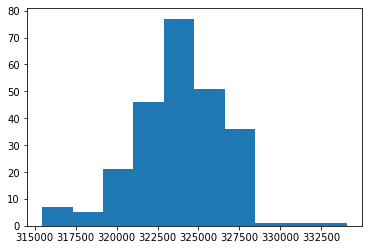

In [15]:
plt.hist(x)
plt.show()

In [ ]:
print(i)fdaf

In [ ]:
interval = 180
radius = 50
epsilon = 20
start_time_dt = data[start_time][np.random.choice(data.index)]
start_time_dt = datetime(day=5,month=5,year=2021,hour=15,minute=0)
td = timedelta(minutes=interval)
e_cwgraph = build_cwgraph(data, start_time_dt, start_time_dt + td, radius=radius, epsilon=epsilon)
e_data = pd.DataFrame([[e_cwgraph.nodes[station]['x'],e_cwgraph.nodes[station]['y'],e_cwgraph.nodes[station]['change']]for station in e_cwgraph if e_cwgraph.nodes[station]['type'] !='worker'])


In [ ]:
e_data.index= [station for station in e_cwgraph if e_cwgraph.nodes[station]['type'] !='worker']
e_data.columns=['lon','lat','change']
e_data.head()

In [ ]:
color = ['ff0000' if i > 0 else '0000ff' for i in m_data.change.values]
size = e_data.change.values
x=e_data.lon.values
y=e_data.lat.values
plt.scatter(x,y,c=np.sign(e_data.change.values)+1,size=size)
plt.show()


In [ ]:
sorted(metro['start_time'].values.tolist(),reverse=True)

In [32]:
arr = np.array([[[i+j+k for i in range(2)] for j in range(4)]for k in range(3)])
print(arr)
arr[:::3]

SyntaxError: invalid syntax (<ipython-input-32-88f220c7c146>, line 3)